In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
from matplotlib import cm, ticker
%matplotlib inline

In [2]:
agrdatename = 'n_2016-5.csv'
data = pd.read_csv(agrdatename, index_col='Unnamed: 0')#Загрузите агрегированные данные о поездках в мае 2016. 
n = np.array([sum(data[data.place==i].n.values) for i in range(1, 2501)])# Просуммируйте общее количество поездок такси из каждой географической зоны
west, south, east, north = -74.25559, 40.49612, -73.70001, 40.91553
ESB_lon, ESB_lat = -73.9857012, 40.7488006
sum(n == 0)# и посчитайте количество ячеек, из которых в мае не было совершено ни одной поездки.

1283

/home/uzd/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/uzd/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/uzd/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


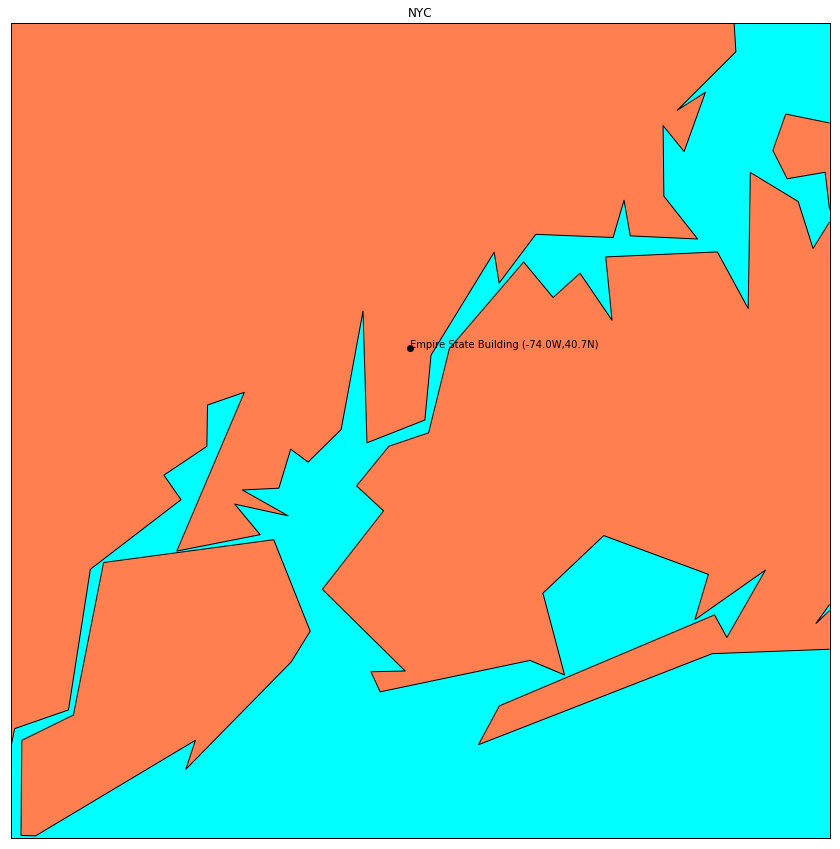

In [3]:
plt.figure(figsize=(15, 15))
m = Basemap(llcrnrlon=west,llcrnrlat=south,urcrnrlon=east,urcrnrlat=north,
            resolution='i',projection='cass',lon_0=0.5*(east+west),lat_0=0.5*(south+north))
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')#Нарисуйте статическую карту Нью-Йорка.
#m.drawparallels(np.linspace(south, north, 51))
#m.drawmeridians(np.linspace(west, east, 51))
m.drawmapboundary(fill_color='aqua')
xpt, ypt = m(ESB_lon, ESB_lat)
m.plot([xpt],[ypt],'ko')#Поставьте на карте точку там, где находится Эмпайр-Стейт-Билдинг.
plt.title("NYC")
lonpt, latpt = m(xpt,ypt,inverse=True)
plt.text(xpt,ypt,'Empire State Building (%5.1fW,%3.1fN)' % (lonpt,latpt))
plt.show()

/home/uzd/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/uzd/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


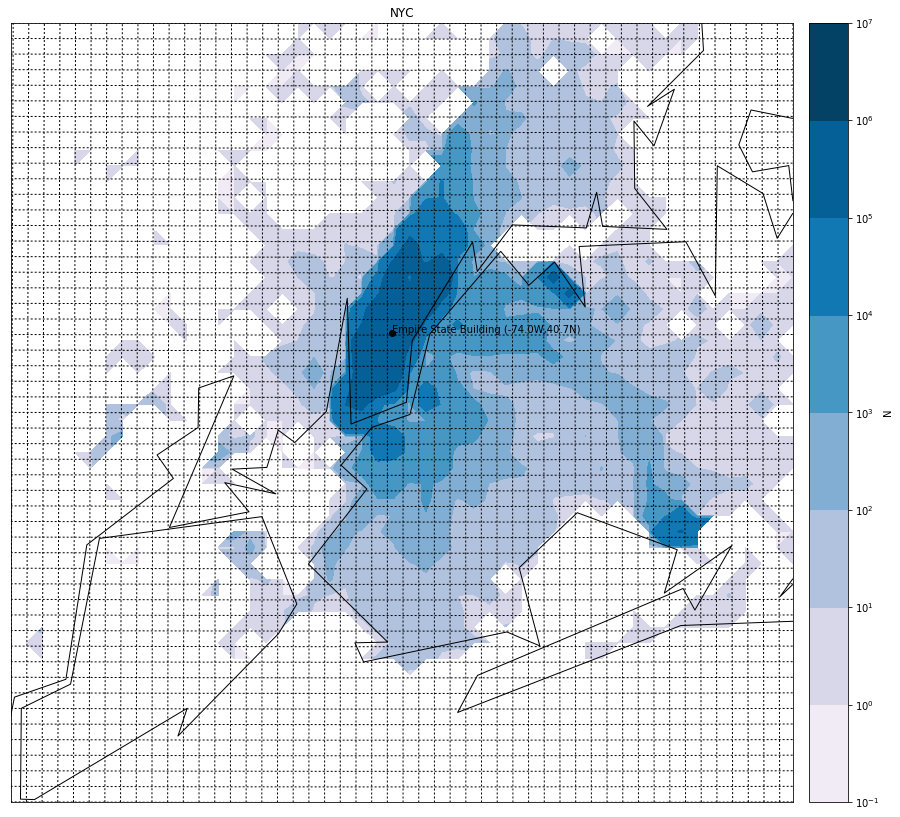

In [4]:
plt.figure(figsize=(15, 15))
m = Basemap(llcrnrlon=west,llcrnrlat=south,urcrnrlon=east,urcrnrlat=north,
            resolution='i',projection='cass',lon_0=0.5*(east+west),lat_0=0.5*(south+north))
m.drawparallels(np.linspace(south, north, 51))
m.drawmeridians(np.linspace(west, east, 51))
m.drawcoastlines()
xpt, ypt = m(ESB_lon, ESB_lat)
m.plot([xpt],[ypt],'ko')
lons, lats = m.makegrid(50, 50)
x, y = m(lons, lats)
z = n.reshape(50, 50).T
cs = m.contourf(x, y, np.ma.masked_where(z <= 0, z), locator=ticker.LogLocator(), cmap=cm.PuBu)
cbar = m.colorbar(cs)#Поверх статической карты Нью-Йорка визуализируйте данные о поездках из каждой ячейки так, чтобы цветовая шкала, в которую вы окрашиваете каждую ячейку, показывала суммарное количество поездок такси из неё.
cbar.set_label('N')
plt.title("NYC")
lonpt, latpt = m(xpt,ypt,inverse=True)
plt.text(xpt,ypt,'Empire State Building (%5.1fW,%3.1fN)' % (lonpt,latpt))
plt.show()

In [5]:
import plotly.plotly as py
from plotly.graph_objs import *
from scipy.io import netcdf
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [6]:
# Make trace-generating function (return a Scatter object)
def make_scatter(x,y):
    return Scatter(
        x=x,
        y=y,
        mode='lines',
        line=Line(color="black"),
        name=' '
    )

# Functions converting coastline/country polygons to lon/lat traces
def polygons_to_traces(poly_paths, N_poly):
    ''' 
    pos arg 1. (poly_paths): paths to polygons
    pos arg 2. (N_poly): number of polygon to convert
    '''
    traces = []  # init. plotting list 

    for i_poly in range(N_poly):
        poly_path = poly_paths[i_poly]
        
        # get the Basemap coordinates of each segment
        coords_cc = np.array(
            [(vertex[0],vertex[1]) 
             for (vertex,code) in poly_path.iter_segments(simplify=False)]
        )
        
        # convert coordinates to lon/lat by 'inverting' the Basemap projection
        lon_cc, lat_cc = m(coords_cc[:,0],coords_cc[:,1], inverse=True)
        
        # add plot.ly plotting options
        traces.append(make_scatter(lon_cc,lat_cc))
     
    return traces

# Function generating coastline lon/lat traces
def get_coastline_traces():
    poly_paths = m.drawcoastlines().get_paths() # coastline polygon paths
    N_poly = len(poly_paths)
    return polygons_to_traces(poly_paths, N_poly)

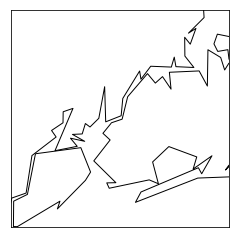

In [7]:
SoLlon, SoLtat = 40.6892776, -74.0445938
trace1 = Scatter(
    y=[SoLlon],
    x=[SoLtat],
    mode='markers',
    name='St. of Liberty',
    #hoverinfo="name"
)

traces_cc = get_coastline_traces()

In [13]:
data = Data([trace1]+traces_cc)

axis_style = dict(
    zeroline=False,
    showline=False,
    showgrid=False,
)

layout = Layout(
    title='Statue of Liberty',
    showlegend=False,
    hovermode="closest",        # highlight closest point on hover
    autosize=False,
    width=1800*(east-west),
    height=1800*(north-south),
)
fig = Figure(data=data, layout=layout)
iplot(fig)#Вставьте интерактивную карту Нью-Йорка — такую, которую можно прокручивать и увеличивать. Поставьте метку там, где находится статуя свободы.

In [14]:
def nth_color(n):
    return ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown'][int(np.log10(n))]
def nth_name(n):
    return ['1-10', '10-100', '100-1000', '1000-10^4', '10^4-10^5', '10^5-10^6', '10^6-10^7'][int(np.log10(n))]

In [15]:
%%time

regions = pd.read_csv('regions.csv', sep=';', index_col='region')
regions['n'] = n
regt=regions.T
del regions

def scat(i):
    x = regt[i]
    west, east, south, north, n = x[0], x[1], x[2], x[3], x[4]
    return Scatter(
        x=[ west, west, east, east ],
        y=[ south, north, north, south ],
        mode='line',
        marker = dict(
            size = 0,
            color = nth_color(n),
            line = dict(
                width = 0,
                color = nth_color(n)
            )
        ),
        hoverinfo="name",
        fill="toself",
        name=nth_name(n),
        fillcolor=nth_color(n)
    )
sqrs = [scat(i) for i in regt.columns[np.ma.masked_where(n >=1, n).mask]]

CPU times: user 772 ms, sys: 0 ns, total: 772 ms
Wall time: 766 ms


In [16]:
data = Data(sqrs+[trace1]+traces_cc)

axis_style = dict(
    zeroline=False,
    showline=False,
    showgrid=False,
)

layout = Layout(
    title='Yellow taxi trips by squares in NYC in may 2016',
    showlegend=False,
    hovermode="closest",        # highlight closest point on hover
    autosize=False,
    width=1800*(east-west),
    height=1800*(north-south),
)
fig = Figure(data=data, layout=layout)
iplot(fig)#Нарисуйте на интерактивной карте Нью-Йорка ячейки так, чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.

In [17]:
#Чтобы не выбирать из всех 2500 ячеек вручную, отфильтруйте ячейки, из которых в мае совершается в среднем меньше 5 поездок в час. Посчитайте количество оставшихся. Проверьте на карте, что среди этих ячеек нет таких, из которых поездки на самом деле невозможны.
np.sum(np.ma.masked_where(n >=24*31*5, n).mask)

102

In [18]:
regions = pd.read_csv('regions.csv', sep=';', index_col='region')
regions['n'] = n
regt=regions.T
del regions

def scat(i):
    x = regt[i]
    west, east, south, north, n = x[0], x[1], x[2], x[3], x[4]
    return Scatter(
        x=[ west, west, east, east ],
        y=[ south, north, north, south ],
        mode='line',
        marker = dict(
            size = 0,
            color = 'purple',
            line = dict(
                width = 0,
                color = 'purple'
            )
        ),
        hoverinfo="name",
        fill="toself",
        name='>=5',
        fillcolor='blue'
    )
sqrs = [scat(i) for i in regt.columns[np.ma.masked_where(n >=24*31*5, n).mask]]

In [19]:
data = Data(sqrs+[trace1]+traces_cc)

axis_style = dict(
    zeroline=False,
    showline=False,
    showgrid=False,
)

layout = Layout(
    title='Yellow taxi trips by squares in NYC in may 2016',
    showlegend=False,
    hovermode="closest",        # highlight closest point on hover
    autosize=False,
    width=1800*(east-west),
    height=1800*(north-south),
)
fig = Figure(data=data, layout=layout)
iplot(fig)

In [20]:
from plotly.figure_factory import create_streamline
x = np.linspace(-3, 3, 10)
y = np.linspace(-3, 3, 10)
Y, X = np.meshgrid(x, y)
u = -1 - X**2 + Y
v = 1 + X - Y**2

# Create streamline figure
fig = create_streamline(x, y, u, v, arrow_scale=.1)
iplot(fig)